Master GitHub Link :https://github.com/SaiCharan99/GL-Capstone-NLP2/tree/main

## NLP - 2 - Semi Ruled Chat-bot

In [279]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from collections import Counter

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [280]:
import pandas as pd
df=pd.read_csv("data.csv")

In [281]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [282]:
df.isnull().sum()
#no null values

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [283]:
df.duplicated().sum()
#no duplicates

0

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
Unnamed: 0                  425 non-null int64
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [285]:
df.shape
df.head()
#We have 425 rows of data with 11 different features

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


[('Pressed', 24), ('Manual Tools', 20), ('Chemical substances', 17), ('Venomous Animals', 16), ('Cut', 14), ('Projection', 13), ('Bees', 10), ('Fall', 9), ('Vehicles and Mobile Equipment', 8), ('Pressurized Systems', 7)]


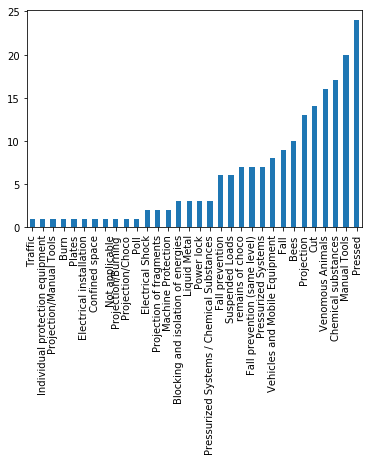

In [286]:
CR=df["Critical Risk"]
CR_Others = CR[CR=='Others']
CR_NoOthers = CR[CR!='Others']#Contains all the Critical Risks without 'others'

words = Counter(CR_NoOthers)
df_words = pd.DataFrame.from_dict(words, orient='index')
df_words = df_words.rename(columns={df_words.columns[0]: 'Count'})

df_words=df_words.sort_values("Count")
df_words["Count"].plot(kind='bar')
print(words.most_common(10))


In [287]:
# We can see that most critical risks are caused by:-
# Pressed:- Incidents involving machinery causing accidental press
# Manual Tools:- Accidents due to none proper usage of manual tools
# Chemical Substances:- Accidents due to improper usage of hazardous chemicals

In [288]:
x=df.copy()

In [289]:
# extracting year,moth and date from timestamp column
year=[]
month=[]
date=[]
for x in range(df.shape[0]):
  h=df['Data'][x].split()
  k=h[0].split('-')
  year.append(int(k[0]))
  month.append(int(k[1]))
  date.append(int(k[2]))

In [290]:
dates=list(zip(year,month,date))
df_date=pd.DataFrame(dates,columns=['Year','Month','Date'])
df_date.head()
#Breaking down date into appropriate fields

,Year,Month,Date
0,2016,1,1
1,2016,1,2
2,2016,1,6
3,2016,1,8
4,2016,1,10


In [291]:
df_new=pd.concat([df,df_date],axis=1)

In [292]:
col=df_new.columns.to_list()
col

['Unnamed: 0',
 'Data',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description',
 'Year',
 'Month',
 'Date']

In [293]:
#concatenating the columns in one dataframe
col1 =col[:2]+col[-3:]+col[2:-3]
col1

['Unnamed: 0',
 'Data',
 'Year',
 'Month',
 'Date',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description']

In [294]:
df_latest = df_new[col1]

In [295]:
df_latest.drop(['Unnamed: 0','Data'], axis=1,inplace = True)
df_latest.head(3)

,Year,Month,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016,1,1,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016,1,2,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016,1,6,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


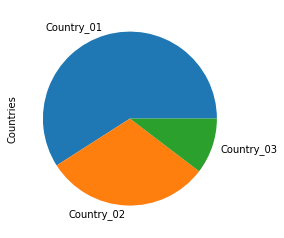

In [296]:
#calculate the percentage of each Country category.
df_latest.Countries.value_counts(normalize=True)

#plot the pie chart of Country categories
df_latest.Countries.value_counts(normalize=True).plot.pie()
plt.show()
#Majority of the records belong to country 1

In [297]:
df_latest['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [298]:
Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5
}

In [299]:
df_latest['Accident_Level'] = df_latest['Accident Level'].map(Accident_Level)
#Converting the Roman numbers into numbers for out model

In [300]:
df_latest['Accident_Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident_Level, dtype: int64

In [301]:
#Cleaning up the data,removing stopwords,remove punctuation, converting them into tokens.

In [302]:
import string
import re
import os
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def clean_text(text):
    
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    #remove numbers
    text = re.sub(r'\d+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text_tokens = tokenizer.tokenize(text)

    text_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            text_clean.append(word)
    return text_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [303]:
df_latest['Description'][0]
#Sample of Raw Description

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [304]:
b = clean_text(df_latest['Description'][0])
b
#Sample of pre-processed Description

['removing',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'supports',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hands',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slides',
 'point',
 'support',
 'tightens',
 'fingers',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo']

In [305]:
all_word = []

for row in df_latest['Description']:
    for word in clean_text(row):
        all_word.append(word)

In [306]:
num_words=len(all_word)
num_words
#total number of words


14120

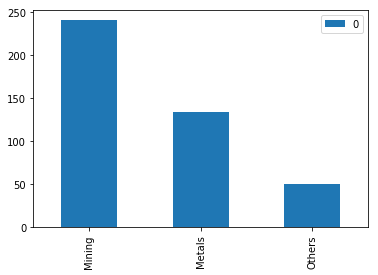

In [307]:
industry = Counter(df_latest["Industry Sector"])
df = pd.DataFrame.from_dict(industry, orient='index')
df.plot(kind='bar')
#Majority of the accidents seem to happen in the mining industry

In [308]:
df_latest.head()

,Year,Month,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Accident_Level
0,2016,1,1,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1
1,2016,1,2,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1
2,2016,1,6,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1
3,2016,1,8,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1
4,2016,1,10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,4


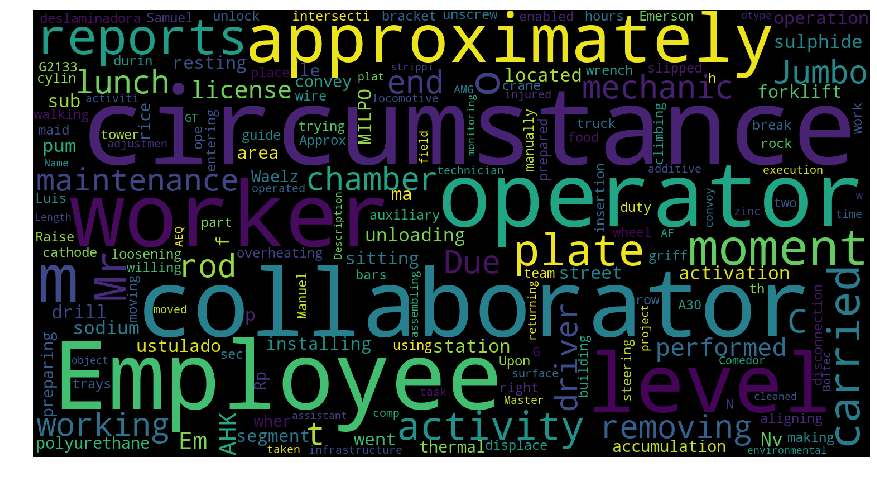

In [309]:
from wordcloud import WordCloud

desc = df_latest['Description']
wordcloud = WordCloud(width = 1500, height = 800, random_state = 1, background_color='black', min_font_size=5, max_words=300, collocations=False).generate(str(desc))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#Most used words are maintainance, accident, employee, euipment, infrastructure, which can be see in the word cloud

In [310]:
# http://nlp.stanford.edu/data/glove.6B.zip

In [311]:
#!unzip glove*.zip

In [312]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'word2vec.txt'
# The first step is to convert the GloVe file format to the word2vec file format. 
# The only difference is the addition of a small header line. This can be done by calling the 
# glove2word2vec() function.

glove2word2vec(glove_input_file, word2vec_output_file)

In [313]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [314]:
#Converting Description into GloVe embeddings
import numpy as np
glove_list = list()
for row in df_latest['Description']:
    sentence = np.zeros(300)
    count = 0
    for word in clean_text(row):
        try:
            sentence += model[word]
            count += 1
        except KeyError:
            continue
    glove_list.append(sentence / count)

In [315]:
acc = []
mod = []
def get_accuracy(y,x):
    global t
    acc.append(x)
    mod.append(y)
    temp=pd.DataFrame(mod,columns=['Model'])
    temp1 = pd.DataFrame(acc,columns=['accuracy'])
    t =temp.join(temp1)
    print(t)
#Creating a function to store and print model accuracies

### Model Building

In [316]:
X = df_latest.Description
y = df_latest['Accident_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tf_vectorizer = TfidfVectorizer() 
cv_vectorizer = CountVectorizer() 

In [317]:
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_train_cv = cv_vectorizer.fit_transform(X_train)

In [318]:
X_test_tf = tf_vectorizer.transform(X_test)
X_test_cv = cv_vectorizer.transform(X_test)


In [319]:
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 340, n_features: 3022
n_samples: 85, n_features: 3022


In [320]:
naive_bayes_classifier_tf = MultinomialNB()
naive_bayes_classifier_cv = MultinomialNB()
naive_bayes_classifier_tf.fit(X_train_tf, y_train)
naive_bayes_classifier_cv.fit(X_train_cv, y_train)

#naive bayes with TfidfVectorizer and CountVectorizer

MultinomialNB()

In [321]:
y_pred_tf = naive_bayes_classifier_tf.predict(X_test_tf)
y_pred_cv = naive_bayes_classifier_cv.predict(X_test_cv)



# computing the accuracins of tf and cv
score_tf = metrics.accuracy_score(y_test, y_pred_tf)
score_cv = metrics.accuracy_score(y_test, y_pred_cv)
get_accuracy('tf_vectorizer with naive_bayes',naive_bayes_classifier_tf.score(X_test_tf,y_test))


                            Model  accuracy
0  tf_vectorizer with naive_bayes  0.717647


In [322]:
get_accuracy('cv_vectorizer with naive_bayes ',naive_bayes_classifier_cv.score(X_test_cv,y_test))


                             Model  accuracy
0   tf_vectorizer with naive_bayes  0.717647
1  cv_vectorizer with naive_bayes   0.705882


In [323]:
SVC_tf = SVC()
SVC_cv = SVC()
#trying out with SVC

In [324]:
SVC_tf.fit(X_train_tf, y_train)
SVC_cv.fit(X_train_cv, y_train)

SVC()

In [325]:
y_pred_tf_SVC = SVC_tf.predict(X_test_tf)
y_pred_cv_SVC = SVC_cv.predict(X_test_cv)



# computing the accuracies of tf and cv
score_tf_SVC = metrics.accuracy_score(y_test, y_pred_tf_SVC)
score_cv_SVC = metrics.accuracy_score(y_test, y_pred_cv_SVC)
print("tf_vectorizer with SVC accuracy:   %0.3f" % score_tf_SVC)
print("cv_vectorizer with SVC accuracy:   %0.3f" % score_cv_SVC)

get_accuracy('tf_vectorizer with SVC',SVC_tf.score(X_test_tf,y_test))


tf_vectorizer with SVC accuracy:   0.718
cv_vectorizer with SVC accuracy:   0.718
                             Model  accuracy
0   tf_vectorizer with naive_bayes  0.717647
1  cv_vectorizer with naive_bayes   0.705882
2           tf_vectorizer with SVC  0.717647


In [326]:
get_accuracy('cv_vectorizer with SVC',SVC_tf.score(X_test_cv,y_test))


                             Model  accuracy
0   tf_vectorizer with naive_bayes  0.717647
1  cv_vectorizer with naive_bayes   0.705882
2           tf_vectorizer with SVC  0.717647
3           cv_vectorizer with SVC  0.717647


In [327]:
KNeighborsClassifier_tf = KNeighborsClassifier()
KNeighborsClassifier_cv = KNeighborsClassifier()
#trying with KNN

In [328]:
KNeighborsClassifier_tf.fit(X_train_tf, y_train)
KNeighborsClassifier_cv.fit(X_train_cv, y_train)

KNeighborsClassifier()

In [329]:
y_pred_tf_knn = KNeighborsClassifier_tf.predict(X_test_tf)
y_pred_cv_knn = KNeighborsClassifier_cv.predict(X_test_cv)



# computing the accuracins of tf and cv
score_tf_knn = metrics.accuracy_score(y_test, y_pred_tf_knn)
score_cv_knn = metrics.accuracy_score(y_test, y_pred_cv_knn)
print("tf_vectorizer with KNeighborsClassifier accuracy:   %0.3f" % score_tf_knn)
print("cv_vectorizer with KNeighborsClassifier accuracy:   %0.3f" % score_cv_knn)
get_accuracy('tf_vectorizer with KNeighborsClassifier',KNeighborsClassifier_tf.score(X_test_tf,y_test))


tf_vectorizer with KNeighborsClassifier accuracy:   0.694
cv_vectorizer with KNeighborsClassifier accuracy:   0.671
                                     Model  accuracy
0           tf_vectorizer with naive_bayes  0.717647
1          cv_vectorizer with naive_bayes   0.705882
2                   tf_vectorizer with SVC  0.717647
3                   cv_vectorizer with SVC  0.717647
4  tf_vectorizer with KNeighborsClassifier  0.694118


In [330]:
get_accuracy('cv_vectorizer with KNeighborsClassifier',KNeighborsClassifier_cv.score(X_test_cv,y_test))

                                     Model  accuracy
0           tf_vectorizer with naive_bayes  0.717647
1          cv_vectorizer with naive_bayes   0.705882
2                   tf_vectorizer with SVC  0.717647
3                   cv_vectorizer with SVC  0.717647
4  tf_vectorizer with KNeighborsClassifier  0.694118
5  cv_vectorizer with KNeighborsClassifier  0.670588


In [331]:
#From her we will be using glove with word2vec

In [332]:
y = df_latest['Accident_Level']
#Our target variable is Accident Level

X = np.array(glove_list)

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(np.array(glove_list), y, test_size=0.20,random_state=42)
#Splitting our dataset into train and test with 80:20 ratio

In [333]:
from sklearn.ensemble import  RandomForestClassifier
rf =  RandomForestClassifier()

In [334]:
rf.fit(X_tr,y_tr)

RandomForestClassifier()

In [335]:
print(rf.score(X_tr,y_tr))
print(rf.score(X_te,y_te))

0.9941176470588236
0.8


In [336]:
get_accuracy('glove with RandomForestClassifier',rf.score(X_te,y_te))

                                     Model  accuracy
0           tf_vectorizer with naive_bayes  0.717647
1          cv_vectorizer with naive_bayes   0.705882
2                   tf_vectorizer with SVC  0.717647
3                   cv_vectorizer with SVC  0.717647
4  tf_vectorizer with KNeighborsClassifier  0.694118
5  cv_vectorizer with KNeighborsClassifier  0.670588
6        glove with RandomForestClassifier  0.800000


In [337]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier()


In [338]:
bgcl.fit(X_tr,y_tr)


BaggingClassifier()

In [339]:
bgcl.score(X_tr,y_tr)

0.9588235294117647

In [340]:
bgcl.score(X_te,y_te)

0.7764705882352941

In [341]:
get_accuracy('golve with BaggingClassifier',bgcl.score(X_te,y_te))

                                     Model  accuracy
0           tf_vectorizer with naive_bayes  0.717647
1          cv_vectorizer with naive_bayes   0.705882
2                   tf_vectorizer with SVC  0.717647
3                   cv_vectorizer with SVC  0.717647
4  tf_vectorizer with KNeighborsClassifier  0.694118
5  cv_vectorizer with KNeighborsClassifier  0.670588
6        glove with RandomForestClassifier  0.800000
7             golve with BaggingClassifier  0.776471


In [342]:
pred = bgcl.predict(X_te)
pred = pred.astype(int)


In [343]:
print(classification_report(y_te, pred))


              precision    recall  f1-score   support

           1       0.80      0.96      0.87        68
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.78        85
   macro avg       0.21      0.22      0.21        85
weighted avg       0.66      0.78      0.71        85



In [344]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
X = df_latest['Description'].values
y = df_latest['Accident_Level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

max_len = 32
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, truncating='post', padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, truncating='post', padding='post')

word_index = tokenizer.word_index
print("Number of unique words: {}".format(len(word_index)))

embedding = {}
with open("glove.6B.300d.txt", encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

embedding_matrix = np.zeros((num_words, 300))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

embedding_matrix.shape

Number of unique words: 2852


(14120, 300)

In [345]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(297, 32) (297,)
(128, 32) (128,)


In [346]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN
from keras.initializers import Constant
lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=num_words, output_dim=300, embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
lstm_model.add(LSTM(64, dropout=0.1))
lstm_model.add(Dense(num_words, activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 300)           4236000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_4 (Dense)              (None, 14120)             917800    
Total params: 5,247,240
Trainable params: 1,011,240
Non-trainable params: 4,236,000
_________________________________________________________________


In [347]:
history = lstm_model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_data=(X_test, y_test))


Epoch 1/4
1/1 [==============================] - ETA: 0s - loss: 9.5448 - accuracy: 0.0000e+ - 2s 2s/step - loss: 9.5448 - accuracy: 0.0000e+00 - val_loss: 9.5109 - val_accuracy: 0.0703
Epoch 2/4
1/1 [==============================] - ETA: 0s - loss: 9.5145 - accuracy: 0.03 - 0s 223ms/step - loss: 9.5145 - accuracy: 0.0303 - val_loss: 9.4766 - val_accuracy: 0.7266
Epoch 3/4
1/1 [==============================] - ETA: 0s - loss: 9.4820 - accuracy: 0.68 - 0s 215ms/step - loss: 9.4820 - accuracy: 0.6835 - val_loss: 9.4374 - val_accuracy: 0.7656
Epoch 4/4
1/1 [==============================] - ETA: 0s - loss: 9.4442 - accuracy: 0.73 - 0s 219ms/step - loss: 9.4442 - accuracy: 0.7340 - val_loss: 9.3924 - val_accuracy: 0.7656


In [348]:
print(classification_report(y_test, np.argmax(lstm_model.predict(X_test), axis=-1)))


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        98
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accuracy                           0.77       128
   macro avg       0.15      0.20      0.17       128
weighted avg       0.59      0.77      0.66       128



In [349]:
biLSTM = Sequential()
import tensorflow as tf
biLSTM.add(Embedding(input_dim=num_words, output_dim=300, 
                    embeddings_initializer=Constant(embedding_matrix), 
        input_length=max_len, trainable=False))
biLSTM.add(Bidirectional(LSTM(units=64, recurrent_dropout = 0.3, dropout = 0.3, 
                             return_sequences = True)))
biLSTM.add(Bidirectional(LSTM(units=32, recurrent_dropout = 0.1, dropout = 0.1)))
biLSTM.add(Dense(num_words, activation='softmax'))


In [350]:
biLSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01), 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [351]:
biLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 300)           4236000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32, 128)           186880    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_5 (Dense)              (None, 14120)             917800    
Total params: 5,381,896
Trainable params: 1,145,896
Non-trainable params: 4,236,000
_________________________________________________________________


In [352]:
history = biLSTM.fit(X_train, y_train, epochs=4, batch_size=1024, 
                    validation_data=(X_test, y_test))

Epoch 1/4
1/1 [==============================] - ETA: 0s - loss: 9.5558 - accuracy: 0.0000e+ - 7s 7s/step - loss: 9.5558 - accuracy: 0.0000e+00 - val_loss: 9.2931 - val_accuracy: 0.7656
Epoch 2/4
1/1 [==============================] - ETA: 0s - loss: 9.3076 - accuracy: 0.73 - 1s 874ms/step - loss: 9.3076 - accuracy: 0.7340 - val_loss: 8.6132 - val_accuracy: 0.7656
Epoch 3/4
1/1 [==============================] - ETA: 0s - loss: 8.6246 - accuracy: 0.73 - 1s 892ms/step - loss: 8.6246 - accuracy: 0.7340 - val_loss: 7.8432 - val_accuracy: 0.7656
Epoch 4/4
1/1 [==============================] - ETA: 0s - loss: 7.8564 - accuracy: 0.73 - 1s 884ms/step - loss: 7.8564 - accuracy: 0.7340 - val_loss: 6.9006 - val_accuracy: 0.7656


In [353]:
print(classification_report(y_test, np.argmax(biLSTM.predict(X_test), axis=-1)))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        98
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2

    accuracy                           0.77       128
   macro avg       0.15      0.20      0.17       128
weighted avg       0.59      0.77      0.66       128



###### From all the above models developed, bagging classifer and random classifier are giving the best accuracy. But when we check the other parameters like precision, recall and f1-score they prove the models are skewed towards I. This results in all the responses being I in the chatbot

###### So, lets try to resolve the imbalance

In [436]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_tr, y_tr.ravel())
#Using SMOTE to resolve the imbalance
bgcl_smote=BaggingClassifier()
rf_smote =  RandomForestClassifier()

bgcl_smote.fit(x_train,y_train)
rf_smote.fit(x_train,y_train)


bgcl_smote.score(X_te,y_te)
rf_smote.score(X_te,y_te)
print('RandomForest Classifier with SMOTE',rf_smote.score(X_te,y_te))
print('\nBagging Classifier with SMOTE',bgcl_smote.score(X_te,y_te))






RandomForest Classifier with SMOTE 0.7647058823529411

Bagging Classifier with SMOTE 0.6823529411764706


In [437]:
print("RandomForest Classifier with SMOTE classification report:-")
pred_rf_smote = rf_smote.predict(X_te)
print(classification_report(y_te, pred_rf_smote))

RandomForest Classifier with SMOTE classification report:-
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        68
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.76        85
   macro avg       0.16      0.19      0.17        85
weighted avg       0.64      0.76      0.70        85



In [438]:
print("Bagging Classifier with SMOTE classification report:-")
pred_bgcl_smote = bgcl_smote.predict(X_te)
print(classification_report(y_te, pred_bgcl_smote))

Bagging Classifier with SMOTE classification report:-
              precision    recall  f1-score   support

           1       0.84      0.79      0.82        68
           2       0.25      0.33      0.29         6
           3       0.00      0.00      0.00         5
           4       0.40      0.50      0.44         4
           5       0.00      0.00      0.00         2

    accuracy                           0.68        85
   macro avg       0.30      0.33      0.31        85
weighted avg       0.71      0.68      0.70        85



## GUI

In [440]:
from tkinter import *
gui = Tk()
gui.title("Accident Chatbot ACB")

def predict(b):
    b=[b]
    glove_list = list()
    for row in b:
        sentence = np.zeros(300)
        count = 0
        for word in clean_text(row):
            try:
                sentence += model[word]
                count += 1
            except KeyError:
                continue
        glove_list.append(sentence / count)
    gloveListArray=np.array(glove_list)
    return bgcl_smote.predict(gloveListArray)
    
    
    

def send():
    send = "\nYou -> "+e.get()+'\n'
    txt.insert(END, " "+send)
    user = e.get().lower()
    prediction=predict(user) #this returns the prediction from the model
    print(prediction) #prints the prediction in the notebook
    if prediction==1:
        pred='I'
    elif prediction==2:
        pred='II'
    elif prediction==3:
        pred='III'
    elif prediction==4:
        pred='IV'
    elif prediction==5:
        pred='V'
    elif prediction==6:
        pred='VI'
            
    

    txt.insert(END,  "ACB -> The accident is of level: "+ pred+"\n")
    e.delete(0, END)


txt = Text(gui)
txt.insert(END,  "                   Hi! Welcome to the accident report portal."+"\n\n" +"My name is Accident Chatbot ACB."+"\n" + "Please describe the accident in the below box:-\n")

txt.grid(row=0, column=0,columnspan=2)
e = Entry(gui, width=100)
e.grid(row=2, column=0)
send = Button(gui, text="Send", command=send).grid(row=2, column=1)#on click on send, invokes send function and passes the typed in text
gui.mainloop() #loops as this is a chatbot

[5]
[2]
[4]


In [441]:
#Hence we have successfully tried various models and found the best practically working in Bagging Classifier using SMOTE 